In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("startup_data.csv")

plot_columns = [
       # 좌표
       'longitude', 'latitude',

       # 날짜형
       'founded_at', 'closed_at',
       
       
       # 숫자형
       'milestones', 
       'age_first_funding_year', 'age_last_funding_year', 
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 
       
       'funding_rounds', 'funding_total_usd', 'avg_participants',

       'first_funding_at', 'last_funding_at', 
       
       # 범주형
       'state_code', 'category_code', 'funding_rounds', 'is_top500', 
       
       # 목표값
       'status'

]

numeric_columns = [
       # 좌표
       'longitude', 'latitude',

       'milestones', 
       'age_first_funding_year', 'age_last_funding_year', 
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 

       'funding_rounds','funding_total_usd', 'avg_participants',

]

date_columns = [
       # 날짜
       'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 
]

categorical_columns = [
       # 범주형
       'state_code', 'category_code', 'funding_rounds', 'is_top500', 
]

plot_df = df[plot_columns].copy().reset_index(drop=True)

numeric_df = df[numeric_columns].copy().reset_index(drop=True)
date_df = df[date_columns].copy().reset_index(drop=True)
categorical_df = df[categorical_columns].copy().reset_index(drop=True)
target = df['status'].copy().reset_index(drop=True)



In [72]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 923 non-null    float64
 1   latitude                  923 non-null    float64
 2   milestones                923 non-null    int64  
 3   age_first_funding_year    923 non-null    float64
 4   age_last_funding_year     923 non-null    float64
 5   age_first_milestone_year  771 non-null    float64
 6   age_last_milestone_year   771 non-null    float64
 7   relationships             923 non-null    int64  
 8   funding_rounds            923 non-null    int64  
 9   funding_total_usd         923 non-null    int64  
 10  avg_participants          923 non-null    float64
 11  first_funding_at          923 non-null    object 
 12  last_funding_at           923 non-null    object 
dtypes: float64(7), int64(4), object(2)
memory usage: 93.9+ KB


In [28]:
# 전체 스타일 설정
plt.style.use('classic')  # 또는 'classic'

# seaborn 설정
sns.set_theme(style='ticks',   # 또는 'whitegrid', 'darkgrid' 등
              palette=['red', 'blue', 'green', 'yellow', 'purple'])


# matplotlib 파라미터 설정
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'font.size': 10,
    'axes.titlesize': 14,
    'axes.labelsize': 12
})

<Axes: ylabel='Count'>

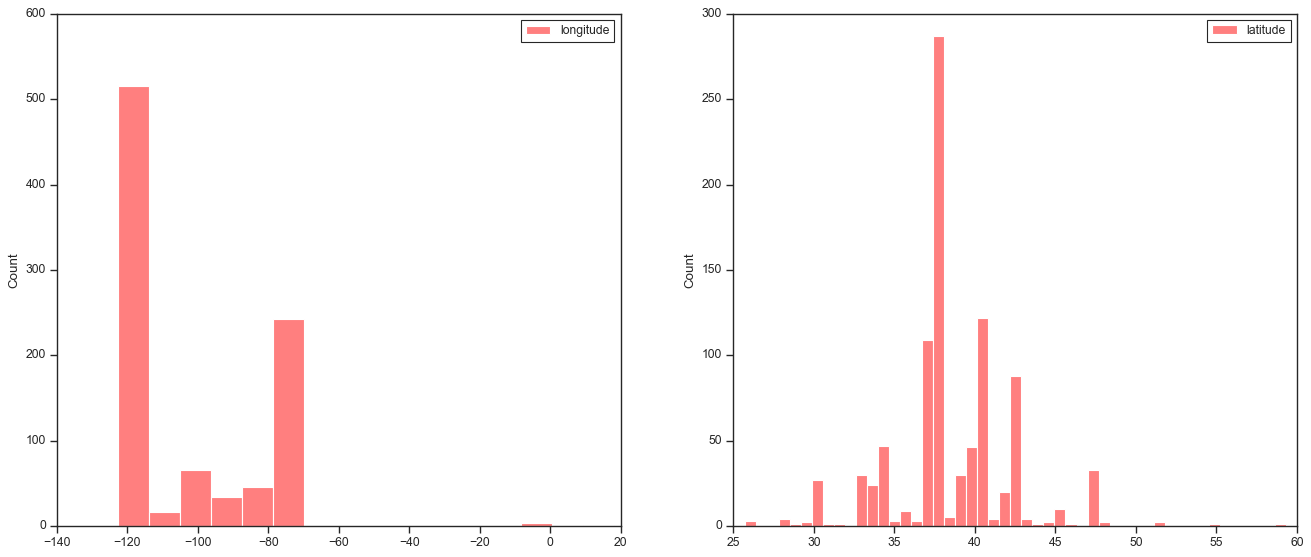

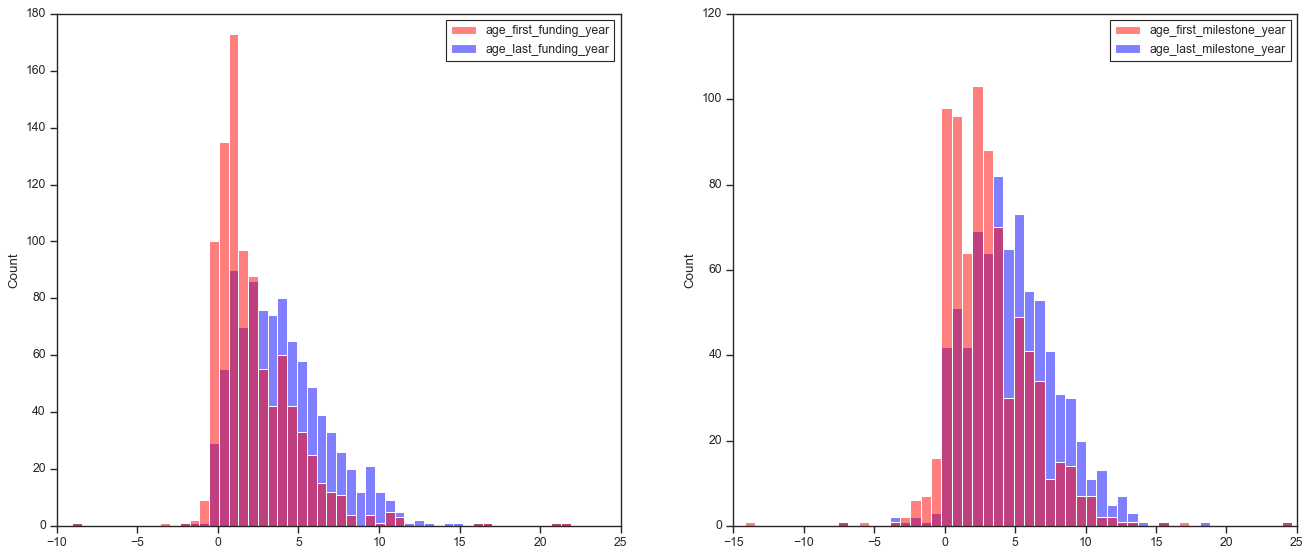

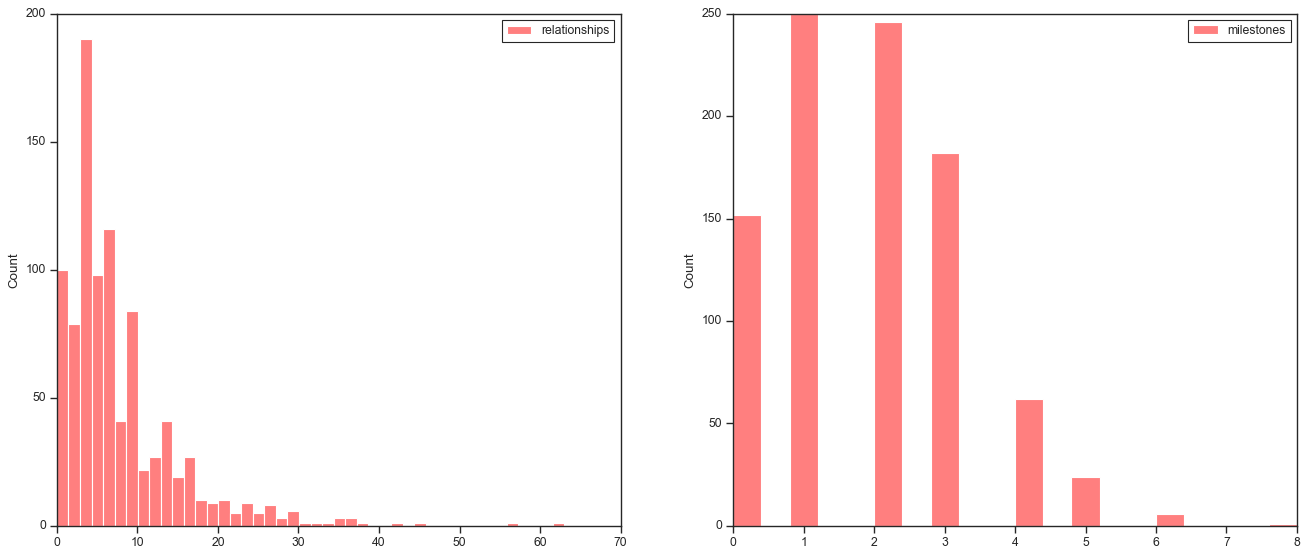

In [33]:
# 위치 데이터 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data=numeric_df[['longitude']], ax=ax1)
sns.histplot(data=numeric_df[['latitude']], ax=ax2)

# 나이 관련 메트릭 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data=numeric_df[['age_first_funding_year', 'age_last_funding_year']], multiple="layer", ax=ax1)
sns.histplot(data=numeric_df[['age_first_milestone_year', 'age_last_milestone_year']], multiple="layer", ax=ax2)

# 기타 메트릭 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data=numeric_df[['relationships']], ax=ax1)
sns.histplot(data=numeric_df[['milestones']], ax=ax2)

Status Distribution:
status
acquired    0.646804
closed      0.353196
Name: proportion, dtype: float64


/var/folders/f1/ryrnk2yd2y768b9_hhyt90v80000gn/T/ipykernel_4089/3926483383.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


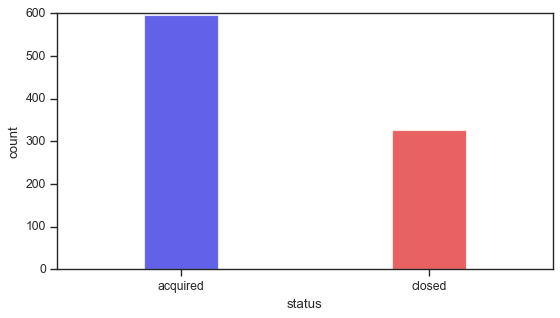

In [79]:
# 기본적인 value_counts()
print("Status Distribution:")
print(df['status'].value_counts(normalize=True))

# 시각화
plt.figure(figsize=(8, 4))
sns.countplot(data=df, 
              x='status',
              width=0.3,
              palette=['blue','red'],
              alpha=0.7)
plt.xticks(rotation=0)
plt.show()


Missing Value Percentages:
closed_at                   63.705309
Unnamed: 6                  53.412784
age_first_milestone_year    16.468039
age_last_milestone_year     16.468039
state_code.1                 0.108342
dtype: float64


/var/folders/f1/ryrnk2yd2y768b9_hhyt90v80000gn/T/ipykernel_4089/2707680734.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentages.index, y=missing_percentages.values, palette=['grey'], width=0.3, alpha=1)
/var/folders/f1/ryrnk2yd2y768b9_hhyt90v80000gn/T/ipykernel_4089/2707680734.py:14: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=missing_percentages.index, y=missing_percentages.values, palette=['grey'], width=0.3, alpha=1)


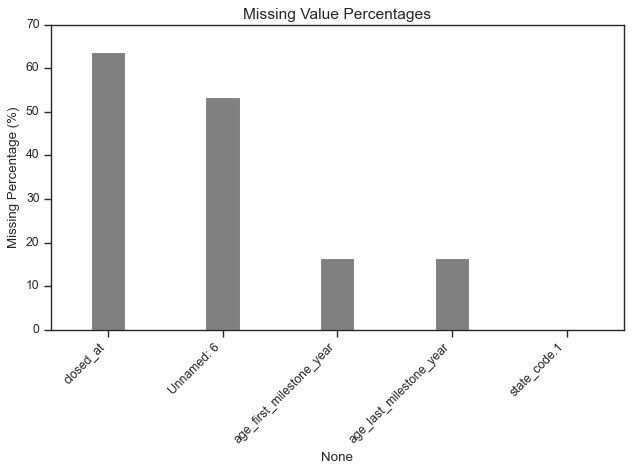

In [59]:
missing_percentages = df.isnull().mean() * 100
print("\nMissing Value Percentages:")
print(missing_percentages[missing_percentages > 0].sort_values(ascending=False))

plt.figure(figsize=(8, 6))
missing_percentages = pd.Series({
    'closed_at': 63.71,
    'Unnamed: 6': 53.41,
    'age_first_milestone_year': 16.47,
    'age_last_milestone_year': 16.47,
    'state_code.1': 0.11
})

sns.barplot(x=missing_percentages.index, y=missing_percentages.values, palette=['grey'], width=0.3, alpha=1)
plt.title('Missing Value Percentages')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Missing Percentage (%)')
plt.tight_layout()
plt.show()

/var/folders/f1/ryrnk2yd2y768b9_hhyt90v80000gn/T/ipykernel_4089/1897387933.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')


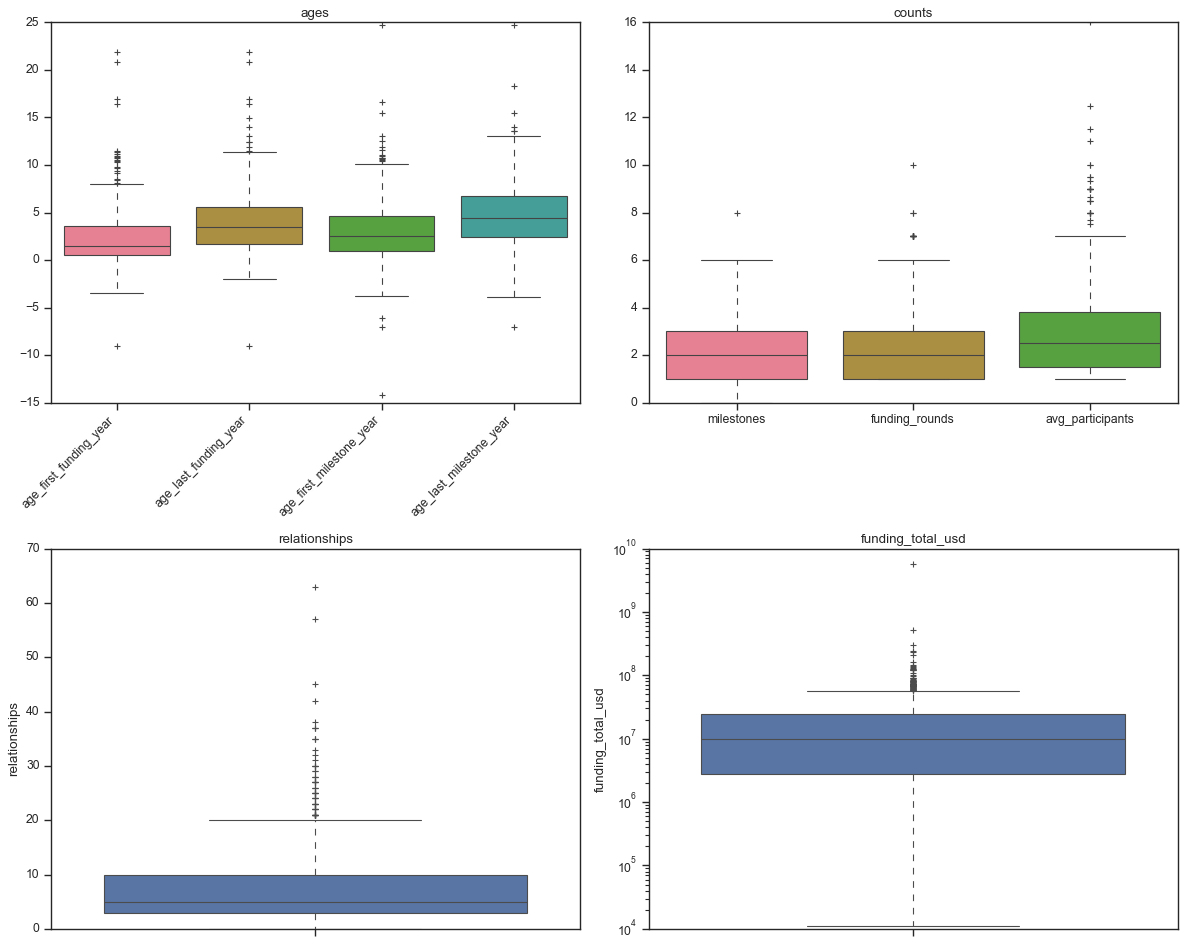

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 스타일 설정
plt.style.use('classic')
sns.set_theme(style='ticks')
sns.set_palette("husl")

# 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(15, 12))


# 1. 나이 관련 변수 분포 (왼쪽 상단)
age_cols = ['age_first_funding_year', 'age_last_funding_year', 
            'age_first_milestone_year', 'age_last_milestone_year']
sns.boxplot(data=numeric_df[age_cols], ax=axes[0,0])
axes[0,0].set_title('ages')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')

# 2. 카운트 변수 분포 (오른쪽 상단)
count_cols = ['milestones', 'funding_rounds', 'avg_participants']
sns.boxplot(data=numeric_df[count_cols], ax=axes[0,1])
axes[0,1].set_title('counts')

# 3. 관계 수 분포 (왼쪽 하단)
sns.boxplot(y=numeric_df['relationships'], ax=axes[1,0])
axes[1,0].set_title('relationships')

# 4. 펀딩 금액 분포 (오른쪽 하단)
sns.boxplot(y=numeric_df['funding_total_usd'], ax=axes[1,1])
axes[1,1].set_title('funding_total_usd')
axes[1,1].set_yscale('log')  # 로그 스케일 적용

# 레이아웃 조정
plt.tight_layout()
plt.show()

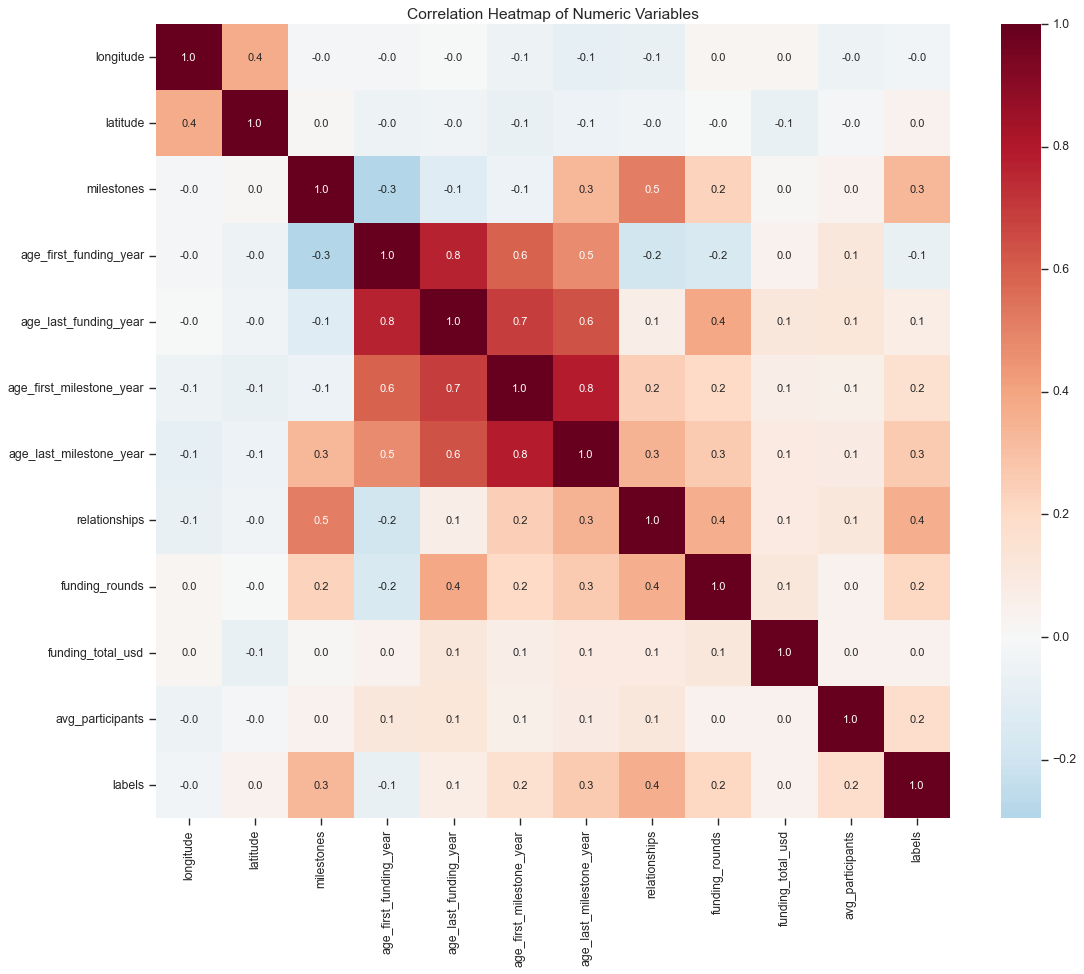

In [75]:

# 상관관계 계산
corr_matrix = df[numeric_columns + ['labels']].corr()

# 히트맵 그리기
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, 
            annot=True,  # 상관계수 표시
            fmt='.1f',   # 소수점 2자리까지
            cmap='RdBu_r',  # Red-Blue 색상맵 (-1: 빨강, 0: 하양, 1: 파랑)
            center=0,     # 0을 중심으로 색상 대칭
            square=True)  # 정사각형 형태로

plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

/Applications/Utilities/anaconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'y' is not defined